<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Curvas de Potencial</h1>
  <h3 class="alert-heading">Prof. Enrique Mejía Ospino, emejia@uis.edu.co</h3>
  <h4 class="alert-heading">Escuela de Química</h4>
  <h4 class="alert-heading">Universidad Industrial de Santander</h4>
  </div>

**<font color=green size=5>OPCIÓN 1**

**<font color=green> Vamos  atilizar el modulo *PSI4* para desarrollar algunos ejercicios de cálculo mecánico-cuántico. En este Cuaderno de Jupyter obtenemos curvas de potencial 2D de moléculas diatómicas y triatómicas.** 

In [1]:
import psi4
import numpy as np
import matplotlib.pyplot as plt
import fortecubeview # Visualizar moléculas
import h5py
import pandas as pd
%matplotlib inline

**<font color=green> Inicializamos las condiciones de maquina.** 

In [2]:
psi4.core.clean()
psi4.core.clean_options()
psi4.set_memory('2000 MB')  # Memoria que sera utilizada en el cálculo
psi4.set_num_threads(8)    # Cantida de hilos a utilzar, tener en cuenta que un núcleo soporta 24 hilos 
psi4.core.set_output_file('./Data/pc1.dat', False)


  Memory set to   1.863 GiB by Python driver.
  Threads set to 8 by Python driver.


**<font color=green> Definimos la geometría de la molécula (HF), en este caso en formato Z-matriz y asignando la distancia entre los dos átomos con una variable *R*.** 

In [3]:
HF = """H
        Cl 1 **R**"""
rvals = np.arange(0.8, 3.5, 0.05)#[0.8, 0.85, 0.9, 0.95, 1.0]

**<font color=green> Dibujamos la molécula usando el modulo *fortecubeview*.** 

In [4]:
HF1 = psi4.geometry("""
H
F 1 0.96
""")
fortecubeview.geom(molecule = HF1)

Renderer(camera=OrthographicCamera(bottom=-5.0, children=(DirectionalLight(color='white', intensity=0.5, posit…

**<font color=green> Obtenemos los valores de energía para los diferentes valor de *R* utilizando *Hatree Fock (HF)* como métdo de cálculo y la base *cc-pVDZ*.** 

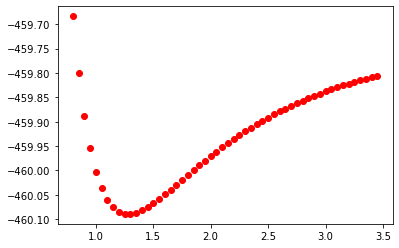

In [27]:
molecules =[]
energies = []
for r in rvals:
    molecule = psi4.geometry(HF.replace("**R**", str(r)))
    molecules.append(molecule)
for mol in molecules:
    energy = psi4.energy("SCF/cc-pVDZ", molecule=mol)
    energies.append(energy)
#print(rvals)
#print(energies)
r=pd.Series(rvals)
e=pd.Series(energies)
re=pd.concat([r, e], axis=1)
pd.DataFrame(re).to_excel('./Data/pc1.xlsx')
re1=pd.read_excel('./Data/pc1.xlsx')
import matplotlib.pyplot as plt
plt.plot(re[0], re[1], 'ro')

**<font color=green> Es posible encontrar las constantes de anharmonicidad con una simple función del modulo *PSI4*.** 

In [8]:
data = psi4.diatomic.anharmonicity(rvals, energies)
print(data)



Performing a fit to 5 data points
{'re': 0.9014127115146683, 'r0': 0.9099199770094608, 'we': 4440.843494322671, 'wexe': 95.78946345244576, 'nu': 4249.264567417779, 'E(re)': -100.01969593667131, 'ZPVE(harmonic)': 2220.4217471613356, 'ZPVE(anharmonic)': 2196.474381298224, 'Be': 21.677645890444822, 'B0': 21.274191980104035, 'ae': 0.8069078206815757, 'De': 0.0020661669418187}



Optimizing geometry based on current surface:

       E =  -100.01969338231866, x =      0.9000000, grad =    -0.00362268369998
       E =  -100.01969593659948, x =      0.9014052, grad =    -0.00001915552689
       E =  -100.01969593667131, x =      0.9014127, grad =    -0.00000000054338
 Final E =  -100.01969593667131, x =      0.9014127, grad =    -0.00000000054338

Equilibrium Energy  -100.01969593667131 Hartrees
Gradient              -0.00000000054338
Quadratic Force Constant     11.1203430 MDYNE/A
Cubic Force Constant        -84.0450430 MDYNE/A**2
Quartic Force Constant      574.8631179 MDYNE/A**3

re      

**<font color=green> Ahora vamos a utilizar un arreglo más grande de valores de *R* y la molécula de Nitrógeno (N2) con el fín de graficar los resultados.** 

In [22]:
N2 = """N
N 1 **d**"""
rvalsn2 = np.linspace(0.7, 4, 50)

In [23]:
fortecubeview.geom(molecule = psi4.geometry("""
N
N 1 0.96
"""))

Renderer(camera=OrthographicCamera(bottom=-5.0, children=(DirectionalLight(color='white', intensity=0.5, posit…

**<font color=green>Obtenemos las energías.** 

In [24]:
molecules =[]
energies = []
for r in rvalsn2:
    molecule = psi4.geometry(N2.replace("**d**", str(r)))
    molecules.append(molecule)
for mol in molecules:
    energy = psi4.energy("SCF/cc-pVDZ", molecule=mol)
    energies.append(energy)
#print(rvals)
print(energies)

[-107.61328499556676, -108.20671302723397, -108.57267687584789, -108.7873685659031, -108.9013630274154, -108.9487751919064, -108.95281817650954, -108.92928220136847, -108.88885084341396, -108.8387108185418, -108.78366675277363, -108.72689212839404, -108.67043027682622, -108.61553976379848, -108.5629454349645, -108.51302431075433, -108.4659377801964, -108.42171824638487, -108.38032101754214, -108.34165372308381, -108.30559366670136, -108.27199960609711, -108.24072076544572, -108.21160377725118, -108.18449763667309, -108.15925687295793, -108.13574335554257, -108.11382720236898, -108.09338716330657, -108.07431071050308, -108.05649395245494, -108.03984142230155, -108.0242657641167, -108.00968733414071, -107.99603373246785, -107.98323927848811, -107.97124444080362, -107.95999523232824, -107.94944258381591, -107.93954171516972, -107.93025152676448, -107.92153403575684, -107.91335387615239, -107.9056778788538, -107.89847473519663, -107.89171474189004, -107.88536961814586, -107.87941238224215,

**<font color=green>Graficamos.** 

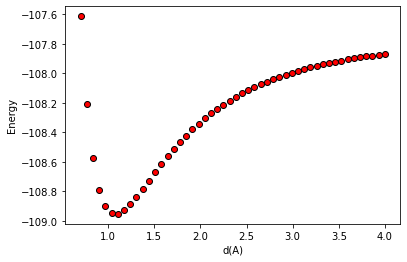

In [12]:
fig, ax = plt.subplots()
ax.scatter(rvalsn2, energies, color='red', edgecolors=(0, 0, 0))
ax.set_xlabel('d(A)')
ax.set_ylabel('Energy')
plt.show()

**<font color=blue size=5>OPCIÓN 2**

**<font color=blue> Vamos  atilizar el modulo *PSI4* para desarrollar algunos ejercicios de cálculo mecánico-cuántico. En este Cuaderno de Jupyter obtenemos curvas de potencial 2D de moléculas diatómicas y triatómicas.** 

In [25]:
# Definimos la Molécula
n2 = """
n
n   1 hh2     

hh2 = {0}"""

# M´wtodos de cálculo
method1 = 'scf/cc-pvdz'
method2 = 'casscf/cc-pvdz'

psi4.core.set_output_file('./Data/n2-cas-symm.dat', False) 

In [27]:
rn =[]
energies = []
rn2 = np.linspace(0.7, 4, 60)
for r in rn2:
    molecula = psi4.geometry(n2.format(r))
    molecula.reset_point_group('d2h')
    psi4.set_options({'fail_on_maxiter':'false'})
    psi4.set_options({'restricted_docc':[1,0,0,0,0,1,0,0]})
    psi4.set_options({'active':[2,0,1,1,0,2,1,1]})
    Ei, wfni = psi4.energy(method1, molecule = molecula, return_wfn = True)
    rn.append(r)
    energies.append(Ei)
    #psi4.molden(wfni,"n2-cas-symm."+str(r)+".molden") # Guarda cada uno en formato molden 
    
#np.savetxt("n2-cas-symm.csv", energies, delimiter=",",header='H-H Distance,E',comments='')

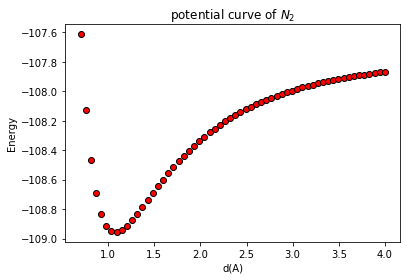

In [32]:
fig, ax = plt.subplots()
ax.scatter(rn, energies, color='red', edgecolors=(0, 0, 0))
ax.set_xlabel('d(A)')
ax.set_ylabel('Energy')
ax.set_title('potential curve of $N_2$')
plt.show()
Edf=pd.DataFrame(energies)

**<font color=green>Podemos realizar los mismos calculos sobre el ángulo *H-O-H* y graficar los resultados.** 

In [30]:
# Vamos a definir otra forma de flexibilizar unos de los parámetros structurales, en este casp el ángulo
# entre los hidrógeno, utilizamos el formato Z-matrix
H2O_angle = """
O
H 1 0.96
H 1 0.96 2 {}
"""

# Scan del ángulo se realizará en el interválo de 30 330, en incrementos de 5 grados
scan = {}
for angle in range(30, 331, 10):
    # Llamamos la molécula en sus diferentesa ángulos
    mol = psi4.geometry(H2O_angle.format(angle))
    # se evoca psi4
    e = psi4.energy('scf/cc-pvdz', molecule=mol) # usamos HF y la base cc-pvdz
    
    # guardamos los resultados
    scan[angle] = e

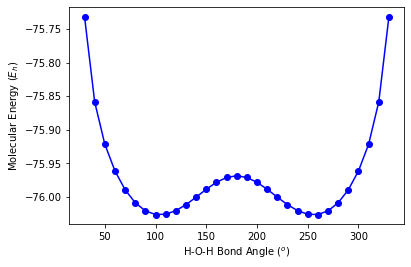

In [31]:
# Visualizar el pérfil de energía
x = list(scan.keys())
y = list(scan.values())
plt.plot(x,y,'bo-')
plt.xlabel(r'H-O-H Bond Angle ($^{o}$)')
plt.ylabel('Molecular Energy ($E_h$)')
plt.show()

In [19]:
xyz = """
O                     0.000000000000     0.000000000000    -0.065775570547
H                     0.000000000000    -0.759061990794     0.521953018286
H                     0.000000000000     0.759061990794     0.521953018286
"""
fortecubeview.geom(xyz = xyz)

Renderer(camera=OrthographicCamera(bottom=-5.0, children=(DirectionalLight(color='white', intensity=0.5, posit…

**<font color=green>Vamos a realizar la curva de potencial angular de la molécula de peróxido de hidrógeno (HOOH), aquí se variará el ángulo dihedro *dih4* manteniendo fijos los demás átomos.** 

In [35]:
HOOH_ang= """
    o
 o   1 oo2     
 h    1 ho3         2 hoo3      
 h    2 ho4         1 hoo4          3 dih4   
 
oo2=        1.462461
ho3=        0.954335
hoo3=       101.178
ho4=        0.954364
hoo4=       101.183
dih4=       {0}"""

In [36]:
# Archivo de salida
psi4.core.set_output_file('./Data/PES_rot_rig.dat', False)

E_theta = np.empty((0,2)) # Una marix 2D para almacenar los resultados
for theta in range(0, 361, 5): # Se scanearán estos ángulos
    # Optimizamos la molécula en sus diferentesa ángulos
    HOOH = psi4.geometry(HOOH_ang.format(theta))
    # Calculamos la energía
    Ei, wfni = psi4.energy('scf/6-31G', molecule = HOOH, return_wfn = True) # usamos HF y la base 6-31G
    E_theta = np.append(E_theta, [[theta,Ei]], axis=0) # Almacenamos los resultados, theta y Energía
    # Guardamos en el formato molden cada una de las estructuras optimizadas para cada ángulo
    psi4.molden(wfni,"./Data/PES_rot_rig."+str(theta)+".molden")

np.savetxt("./Data/PES_rot_rig.csv", E_theta, delimiter=",",header='H-O-O-H Dihedral Angle,E_rigid',comments='')
PES=pd.DataFrame(E_theta)

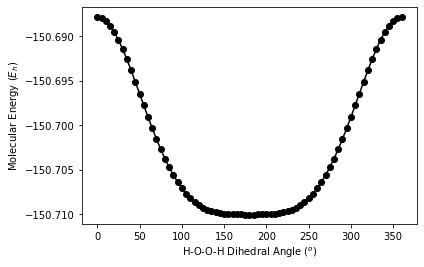

In [38]:
# Visualizar el pérfil de energía
x = PES[0]
y = PES[1]
plt.plot(x,y,'ko-')
plt.xlabel(r'H-O-O-H Dihedral Angle ($^{o}$)')
plt.ylabel('Molecular Energy ($E_h$)')
plt.show()

**<font color=green>Vamos a realizar la curva de potencial angular de la molécula de peróxido de hidrógeno (HOOH), aquí se variará el ángulo dihedro *dih4* pero ahora permitiendo que las demás coordenadas (ángulos, enlaces) se otimizan con cada variación.** 

In [23]:
# Archivo de salida
psi4.core.set_output_file('./Data/PES_rot_relax.dat', False)

E_theta = np.empty((0,2)) # Una marix 2D para almacenar los resultados
for theta in range(0, 361, 5): # Se scanearán estos ángulos
    # Optimizamos la molécula en sus diferentesa ángulos
    HOOH = psi4.geometry(HOOH_ang.format(theta))
    # Reseteamos la simetría
    HOOH.reset_point_group('c1')
    # mantenemos fijo el angulo dihedro que esta entre los atomos 4, 2, 1 y 3 mientras se optimiza la molécula
    psi4.set_module_options('optking', {'frozen_dihedral': '4 2 1 3 '})
    # Calculamos la energía
    Ei, wfni = psi4.energy('scf/6-31G', molecule = HOOH, return_wfn = True) # usamos HF y la base 6-31G
    E_theta = np.append(E_theta, [[theta,Ei]], axis=0) # Almacenamos los resultados, theta y Energía
    # Guardamos en el formato molden cada una de las estructuras optimizadas para cada ángulo
    #psi4.molden(wfni,"/home/emejia/Documents/PES_rot_relax."+str(theta)+".molden")

np.savetxt("./Data/PES_rot_relax.csv", E_theta, delimiter=",",header='H-O-O-H Dihedral Angle,E_rigid',comments='')
PES2=pd.DataFrame(E_theta)

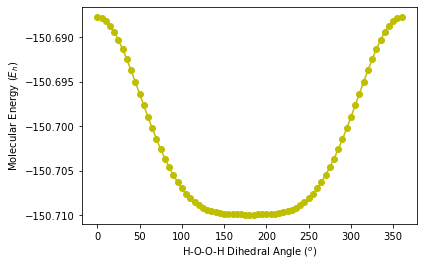

In [24]:
# Visualizar el pérfil de energía
x = PES2[0]
y = PES2[1]
plt.plot(x,y,'yo-')
plt.xlabel(r'H-O-O-H Dihedral Angle ($^{o}$)')
plt.ylabel('Molecular Energy ($E_h$)')
plt.show()

**<font color=green size=5>Ejemplo del etano** 

In [25]:
geometry = """
C
C 1 1.5307
H 1 1.0936 2 111.3578
H 1 1.0936 2 111.3578 3 120
H 1 1.0936 2 111.3578 3 240
H 2 1.0936 1 111.3578 3 60
H 2 1.0936 1 111.3578 3 180
H 2 1.0936 1 111.3578 3 300
"""

In [26]:
ethane = psi4.geometry(geometry)
E, wfn = psi4.energy('scf/6-31g',molecule=ethane, return_wfn=True)
psi4.molden(wfn,'ethane.molden')

In [27]:
from jupyter_jsmol import JsmolView
view1 = JsmolView.from_file("ethane.molden", inline=False) 
view1

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [20]:
fortecubeview.geom(molecule = psi4.geometry(geometry))

Renderer(camera=OrthographicCamera(bottom=-5.0, children=(DirectionalLight(color='white', intensity=0.5, posit…

In [28]:
x = []
y = []

dihedrals = np.arange (0,360, 5)
for d in dihedrals:
    geometry = f"""
    C
    C 1 1.5307
    H 1 1.0936 2 111.3578
    H 1 1.0936 2 111.3578 3 120
    H 1 1.0936 2 111.3578 3 240
    H 2 1.0936 1 111.3578 3 {d}
    H 2 1.0936 1 111.3578 3 {d+120}
    H 2 1.0936 1 111.3578 3 {d+240}
    """

    ethane = psi4.geometry(geometry)
    E, wfn = psi4.energy('scf/6-31g',molecule=ethane, return_wfn=True)
    #print (d,E)
    x.append(d)
    y.append(E)

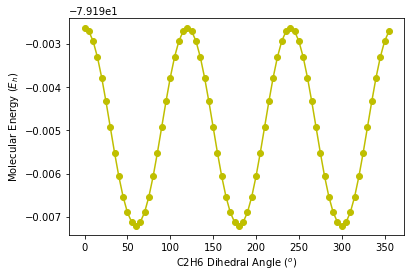

In [29]:
# Visualizar el pérfil de energía
plt.plot(x,y,'yo-')
plt.xlabel(r'C2H6 Dihedral Angle ($^{o}$)')
plt.ylabel('Molecular Energy ($E_h$)')
plt.show()

**<font color=green size=5>Otro Ejemplo** 

In [28]:
geometry2 = """
C
C 1 1.5307
Br 1 2.0 2 111.3578
H 1 1.0936 2 111.3578 3 120
H 1 1.0936 2 111.3578 3 240
Br 2 2.0 1 111.3578 3 60
H 2 1.0936 1 111.3578 3 180
H 2 1.0936 1 111.3578 3 300
"""

In [29]:
dibromoethane = psi4.geometry(geometry2)
E, wfn = psi4.energy('scf/6-31g',molecule=dibromoethane, return_wfn=True)
psi4.molden(wfn,'dibromoethane.molden')

In [30]:
view2 = JsmolView.from_file("dibromoethane.molden", inline=False) 
view2

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [33]:
fortecubeview.geom(molecule = psi4.geometry(geometry2))

Renderer(camera=OrthographicCamera(bottom=-5.0, children=(DirectionalLight(color='white', intensity=0.5, posit…

In [31]:
x = []
y = []

dihedrals = np.arange (0,360, 5)
for d in dihedrals:
    geometry = f"""
    C
    C 1 1.5307
    Br 1 2.0 2 111.3578
    H 1 1.0936 2 111.3578 3 120
    H 1 1.0936 2 111.3578 3 240
    Br 2 2.0 1 111.3578 3 {d}
    H 2 1.0936 1 111.3578 3 {d+120}
    H 2 1.0936 1 111.3578 3 {d+240}
    """

    dibromoethane = psi4.geometry(geometry)
    E, wfn = psi4.energy('scf/6-31g',molecule=dibromoethane, return_wfn=True)
    #print (d,E)
    x.append(d)
    y.append(E)

0 -5220.740264303788
10 -5220.741971414078
20 -5220.746521799029
30 -5220.752513883853
40 -5220.758417209648
50 -5220.763123593801
60 -5220.766127661486
70 -5220.767429989411
80 -5220.767362600076
90 -5220.766443859077
100 -5220.765267071247
110 -5220.764392406117
120 -5220.764230623308
130 -5220.764944179847
140 -5220.766412525115
150 -5220.7682828029
160 -5220.770086750213
170 -5220.771378183419
180 -5220.771845559349
190 -5220.7713781795
200 -5220.770086757661
210 -5220.7682828024645
220 -5220.766412522154
230 -5220.764944176592
240 -5220.764230624346
250 -5220.764392410886
260 -5220.765267066805
270 -5220.766443863179
280 -5220.767362601479
290 -5220.767429984719
300 -5220.7661276699755
310 -5220.76312359371
320 -5220.758417207655
330 -5220.752513875583
340 -5220.746521801229
350 -5220.741971419475


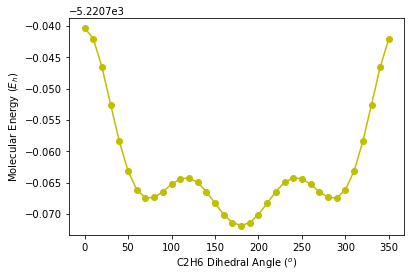

In [32]:
# Visualizar el pérfil de energía
plt.plot(x,y,'yo-')
plt.xlabel(r'C2H6 Dihedral Angle ($^{o}$)')
plt.ylabel('Molecular Energy ($E_h$)')
plt.show()

In [36]:
!cat ijk.dat

Total number of IJK combinations =: 1
Num. of IJK with (Gi,Gj,Gk)=(0,0,0) =: 1
    thread 0: first_ijk=0,  last_ijk=0
